# Ames Housing Data

For this project I will be playing the part of an independent data analyst who is conducting research on housing prices in order to guide seller listings. 

I will do this by creating a linear regression model based on the Ames Housing Dataset. This model will use a robust dataset in order to predict the selling price of a house (limited to linear regression and regularization only). 

The key business question to answer is -  

<font size = 3 color = "blue"> **In order to guide seller listings in the future, how can we use housing features to predict home sales prices?** </font>

From a data science perspective, we are also interested to know which modeling approaches yield the most accurate predictions of sales price.



# Dataset

This dataset consists of over 2000 entries with 80 features (mixture of nominal, discrete, and ordinal) for properties in Ames, Iowa that were sold between the years 2006-2010. 

In order to understand the dataset better, please do review the detailed description here- http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

# Executive Summary

Brief overview of workflow - 

1) Exploratory Data Analysis: To understand relationships between variables, clean up missing data and standardize dataframes. For numerical features, the linear relationship was examined using a heatmap and correlation coefficients. For categorical data, bar plots were created to visualize the mean Sale Price across categories.   

2) Feature Engineering: To amplify signal of categorical data, such that it reflects more accurately in the regression model. 

3) Data Modelling: For this project, several models were created and iterated upon. Lasso was used to select and narrow down features (as the project requirement was limited to 25-30 variables). Models were evaluated and selected based on RMSE score. Interpretations and recommendations were made based off of the best-performing model (ridge).  

Through extensive data analysis, I have come to a model that is able to account for 91% of the variance in housing prices, and is able to predict housing prices within an error (root mean squared) of $24,000.

### Here are the top 5 features (ranked in order) for sellers to consider when listing houses, in order to achieve the highest selling price -

Combination of overall quality and living area 
Basement Square Footage              
Lot Size                                        
Excellent Kitchen Quality                
Sale Type - New 


## Contents:
 
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis + Feature Engineering](#EDA-&-Feature-Engineering)
- [Data Visualization](#Data-Visualization)
- [Data Modelling](#Data-Modelling)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

# Data Import  & Cleaning

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to use for Linear Regression Modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [2]:
#increase display range for easier viewing and EDA

pd.options.display.max_columns = 400
pd.options.display.max_rows = 300

In [3]:
# Import data
train = pd.read_csv('../datasets/train.csv')

test = pd.read_csv('../datasets/test.csv')

In [4]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [5]:
train.shape

(2051, 81)

In [6]:
train.info

<bound method DataFrame.info of         Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley Lot Shap

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [8]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [9]:
train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [10]:
test.shape

(879, 80)

In [11]:
test.info

<bound method DataFrame.info of        Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    2658  902301120          190        RM          69.0      9142   Pave   
1    2718  905108090           90        RL           NaN      9662   Pave   
2    2414  528218130           60        RL          58.0     17104   Pave   
3    1989  902207150           30        RM          60.0      8520   Pave   
4     625  535105100           20        RL           NaN      9500   Pave   
..    ...        ...          ...       ...           ...       ...    ...   
874  1662  527377110           60        RL          80.0      8000   Pave   
875  1234  535126140           60        RL          90.0     14670   Pave   
876  1373  904100040           20        RL          55.0      8250   Pave   
877  1672  527425140           20        RL          60.0      9000   Pave   
878  1939  535327160           20        RL          70.0      8400   Pave   

    Alley Lot Shape Land Contou

In [12]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,879.0,1.445588e+03,8.507171e+02,2.0,692.5,1435.0,2197.0,2.928000e+03
PID,879.0,7.165050e+08,1.889135e+08,526302110.0,528486085.0,535454160.0,907192140.0,1.007100e+09
MS SubClass,879.0,5.827076e+01,4.221139e+01,20.0,20.0,50.0,70.0,1.900000e+02
Lot Frontage,719.0,6.963004e+01,2.362537e+01,21.0,59.0,68.0,80.0,1.820000e+02
Lot Area,879.0,1.034092e+04,1.004734e+04,1477.0,7298.5,9453.0,11606.5,2.152450e+05
Overall Qual,879.0,6.054608e+00,1.374756e+00,2.0,5.0,6.0,7.0,1.000000e+01
Overall Cond,879.0,5.565415e+00,1.128422e+00,1.0,5.0,5.0,6.0,9.000000e+00
Year Built,879.0,1.970534e+03,3.040353e+01,1880.0,1954.0,1972.0,2000.0,2.010000e+03
Year Remod/Add,879.0,1.984445e+03,2.045455e+01,1950.0,1967.0,1992.0,2003.0,2.010000e+03
Mas Vnr Area,878.0,1.069829e+02,1.883568e+02,0.0,0.0,0.0,173.5,1.378000e+03


In [13]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [14]:
test.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1         int64
BsmtFin Type 2      object
B

###  It is clear that these two datasets are very robust, however they require cleaning and standardization before we can proceed with any data analysis.

# Data Cleaning 

In [15]:
#column names formatting
train.columns = [i.lower().replace(' ','_') for i in train.columns]

In [16]:
#column names formatting
test.columns = [i.lower().replace(' ','_') for i in test.columns]

In [17]:
train.isnull().sum()[train.isnull().sum()>0]

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

In [18]:
test.isnull().sum()[test.isnull().sum()>0]

lot_frontage      160
alley             821
mas_vnr_type        1
mas_vnr_area        1
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
electrical          1
fireplace_qu      422
garage_type        44
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
pool_qc           875
fence             707
misc_feature      838
dtype: int64

#### Based on the data description, there are many columns that containing 'NA' which are not actually missing values. To proceed, numerical features containing 'NA' will be set to 0, and categorical features containing an NA will be set to 'None'

In [19]:
for col in train:
    if type(train[col])== 'int64' or 'float64':
        train[col] = train[col].fillna(value=0)
    else:
        train[col] = train[col].fillna(value='None')

In [20]:
for col in test:
    if type(test[col])== 'int64' or 'float64':
        test[col] = test[col].fillna(value=0)
    else:
        test[col] = test[col].fillna(value='None')

In [21]:
train.isnull().sum().sum()

0

In [22]:
test.isnull().sum().sum()

0

### Identify and drop outliers for selected columns

In [23]:
#identify outlier
train[train['garage_yr_blt']>2010][['year_built','garage_yr_blt']]

,year_built,garage_yr_blt
1699,2006,2207.0


In [24]:
#correct outlier assuming they meant to enter 2007
train.loc[1699,'garage_yr_blt'] = 2007

In [25]:
# Converted to age to standardize against different years sold

train['age_at_sale'] = train['yr_sold'] - train['year_built']

In [26]:
test['age_at_sale'] = test['yr_sold'] - test['year_built']

In [27]:
# Standardizing age of remodel

train['age_of_remod'] = train['yr_sold'] - train['year_remod/add']

In [28]:
test['age_of_remod'] = test['yr_sold'] - test['year_remod/add']

In [29]:
# identify outliers 
train[train['total_bsmt_sf']>4000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_at_sale,age_of_remod
960,1499,908154235,60,RL,313.0,63887,Pave,0,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,0,0,0,1,2008,New,160000,0,0
1885,2181,908154195,20,RL,128.0,39290,Pave,0,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,0,0,Elev,17000,10,2007,New,183850,-1,-2


In [30]:
#drop outliers
train.drop(train[train['total_bsmt_sf']>3000].index,inplace=True)

In [31]:
#identify outliers
train[train['lot_area']>60000] 

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_at_sale,age_of_remod
471,2116,906426060,50,RL,0.0,159000,Pave,0,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,0,0,0,Shed,500,6,2007,WD,277000,49,1
694,2072,905301050,20,RL,0.0,115149,Pave,0,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,0,1824,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2.0,739.0,TA,TA,Y,380,48,0,0,0,0,0,0,0,0,6,2007,WD,302000,36,5
1854,2767,906475200,20,RL,62.0,70761,Pave,0,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655.0,Unf,0.0,878.0,1533.0,GasA,TA,Y,SBrkr,1533,0,0,1533,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1975.0,Unf,2.0,576.0,TA,TA,Y,200,54,0,0,0,0,0,0,0,0,12,2006,WD,280000,31,31


In [32]:
#drop outliers
train.drop(train[train['lot_area']>60000].index,inplace=True)

In [33]:
#identify outliers
train[train['totrms_abvgrd']>13]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_at_sale,age_of_remod
858,2195,909176080,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,None,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256.0,Unf,0.0,1184.0,1440.0,GasA,Ex,Y,FuseA,1440,1440,515,3395,0.0,0.0,2,0,8,2,Fa,14,Typ,0,0,0,0.0,0,0.0,0.0,0,0,N,0,110,0,0,0,0,0,0,0,0,3,2007,WD,200000,93,12


In [34]:
#drop outliers
train.drop(858,inplace=True)

## EDA & Feature Engineering 

In [35]:
#writing a function to standardize columns for both DFs

def standardize_columns(df):
    #new feature of baths that combines some overlaps in original dataset
    df['baths'] = df['bsmt_full_bath'] + df['full_bath'] + (df['bsmt_half_bath']/2) + (df['half_bath']/2)
    
    #combining basment sq footage
    df['finished_basement_sqft'] = df['bsmtfin_sf_1'] + df['bsmtfin_sf_2']
    
    #to see if age at sale makes any difference
    df['age_at_sale'] = df['yr_sold'] - df['year_built']
    
    #interaction feature b/w quality and living area
    df['overall_qual_x_gr_liv_area'] = df['overall_qual']*df['gr_liv_area']
    
    #dropping now redundant columns
    df.drop(columns=['bsmt_full_bath', 'full_bath',
                     'bsmt_half_bath','half_bath', 
                     'bsmtfin_sf_1', 'bsmtfin_sf_2', 
                     '1st_flr_sf', '2nd_flr_sf', 'total_bsmt_sf', 'bsmt_unf_sf' ], inplace=True)
    
    #Reworking street columns to reflect paved or gravel
    df['street'] = df['street'].map({'Pave': 1, 'Grvl': 0})
    
    #Reworking central air as Yes or No
    df['has_central_air'] = df['central_air'].map({'Y': 1, 'N': 0})
    
    #See if a newly renovated property sells more
    df['newly_renovated'] = df['year_remod/add'].map(lambda reno: 1 if reno >= 2007 else 0)
    
    #Easier readability of certain features and values
    df['functionality'] = df['functional'].map({
    'Maj2': 'deducted',
    'Mod': 'deducted',                        
    'Min2':'deducted', 
    'Maj1': 'deducted',
    'Min1': 'deducted',
    'Sev': 'severely_damaged',
    'Sal': 'salvage_only',
    'Typ': 'typical'
    
})
    df['building_type'] = df['bldg_type'].map({
    '2fmCon': "two_family_conversion",
    'Twnhs' : 'townhouse_inside_unit',
    'TwnhsE': 'townhouse_end_unit',
    '1Fam': 'single_family',
    'Duplex': 'duplex'
})

In [36]:
#run function for train
standardize_columns(train)

In [37]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,low_qual_fin_sf,gr_liv_area,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_at_sale,age_of_remod,baths,finished_basement_sqft,overall_qual_x_gr_liv_area,has_central_air,newly_renovated,functionality,building_type
0,109,533352170,60,RL,0.0,13517,1,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1479,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,0,0,0,3,2010,WD,130500,34,5,2.5,533.0,8874,1,0,typical,single_family
1,544,531379050,60,RL,43.0,11492,1,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,2122,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,0,0,0,4,2009,WD,220000,13,12,3.5,637.0,14854,1,0,typical,single_family
2,153,535304180,20,RL,68.0,7922,1,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,0,1057,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,0,0,0,1,2010,WD,109000,57,3,2.0,731.0,5285,1,1,typical,single_family
3,318,916386060,60,RL,73.0,9802,1,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,0,1444,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,0,0,0,4,2010,WD,174000,4,3,2.5,0.0,7220,1,1,typical,single_family
4,255,906425045,50,RL,82.0,14235,1,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,0,1445,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,0,0,0,3,2010,WD,138500,110,17,2.0,0.0,8670,1,0,typical,single_family


In [38]:
len(train.columns)

80

In [39]:
#double checking for nulls
train.isnull().sum().sum()

0

In [40]:
#run function for test
standardize_columns(test)

In [41]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,low_qual_fin_sf,gr_liv_area,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,age_at_sale,age_of_remod,baths,finished_basement_sqft,overall_qual_x_gr_liv_area,has_central_air,newly_renovated,functionality,building_type
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,Unf,GasA,Gd,N,FuseP,0,1928,4,2,Fa,9,Typ,0,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,0,0,0,4,2006,WD,96,56,2.0,0,11568,0,0,typical,two_family_conversion
1,2718,905108090,90,RL,0.0,9662,1,0,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,0,1967,6,2,TA,10,Typ,0,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,0,0,0,8,2006,WD,29,29,2.0,0,9835,1,0,typical,duplex
2,2414,528218130,60,RL,58.0,17104,1,0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1496,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,0,0,0,9,2006,New,0,0,3.5,554,10472,1,0,typical,single_family
3,1989,902207150,30,RM,60.0,8520,1,0,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,0,968,2,1,TA,5,Typ,0,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,0,0,0,7,2007,WD,84,1,1.0,0,4840,1,0,typical,single_family
4,625,535105100,20,RL,0.0,9500,1,0,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Gd,Y,SBrkr,0,1394,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,0,0,0,7,2009,WD,46,46,2.5,609,8364,1,0,typical,single_family


In [42]:
len(test.columns)

79

In [43]:
#confirm no nulls for test
test.isnull().sum().sum()

0

### Get Dummies to convert Categorical to Numerical

In [44]:
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)

In [45]:
#filling in missing columns such that they are standardized for both DFs

missing_cols = set(train_dummies.columns ) - set(test_dummies.columns)
    
for c in missing_cols:
    test_dummies[c] = 0
        
test_dummies = test_dummies[train_dummies.columns]


In [46]:
#confirming the above worked

print(train_dummies.shape)
print(test_dummies.shape)

(2042, 310)
(879, 310)


In [47]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,low_qual_fin_sf,gr_liv_area,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_at_sale,age_of_remod,baths,finished_basement_sqft,overall_qual_x_gr_liv_area,has_central_air,newly_renovated,functionality,building_type
0,109,533352170,60,RL,0.0,13517,1,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1479,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,0,0,0,3,2010,WD,130500,34,5,2.5,533.0,8874,1,0,typical,single_family
1,544,531379050,60,RL,43.0,11492,1,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,2122,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,0,0,0,4,2009,WD,220000,13,12,3.5,637.0,14854,1,0,typical,single_family
2,153,535304180,20,RL,68.0,7922,1,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,0,1057,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,0,0,0,1,2010,WD,109000,57,3,2.0,731.0,5285,1,1,typical,single_family
3,318,916386060,60,RL,73.0,9802,1,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,0,1444,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,0,0,0,4,2010,WD,174000,4,3,2.5,0.0,7220,1,1,typical,single_family
4,255,906425045,50,RL,82.0,14235,1,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,0,1445,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,0,0,0,3,2010,WD,138500,110,17,2.0,0.0,8670,1,0,typical,single_family


In [48]:
test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,low_qual_fin_sf,gr_liv_area,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,age_at_sale,age_of_remod,baths,finished_basement_sqft,overall_qual_x_gr_liv_area,has_central_air,newly_renovated,functionality,building_type
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,Unf,GasA,Gd,N,FuseP,0,1928,4,2,Fa,9,Typ,0,0,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,0,0,0,0,4,2006,WD,96,56,2.0,0,11568,0,0,typical,two_family_conversion
1,2718,905108090,90,RL,0.0,9662,1,0,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,0,1967,6,2,TA,10,Typ,0,0,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,0,0,0,0,8,2006,WD,29,29,2.0,0,9835,1,0,typical,duplex
2,2414,528218130,60,RL,58.0,17104,1,0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,0,1496,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,0,0,0,0,9,2006,New,0,0,3.5,554,10472,1,0,typical,single_family
3,1989,902207150,30,RM,60.0,8520,1,0,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,0,968,2,1,TA,5,Typ,0,0,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,0,0,0,0,7,2007,WD,84,1,1.0,0,4840,1,0,typical,single_family
4,625,535105100,20,RL,0.0,9500,1,0,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Gd,Y,SBrkr,0,1394,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,0,0,0,0,7,2009,WD,46,46,2.5,609,8364,1,0,typical,single_family


In [49]:
train.shape

(2042, 80)

In [50]:
test.shape

(879, 79)

In [51]:
# Save values to intermediate file

train.to_csv('../datasets/train_cleaned.csv',index_label=False)
test.to_csv('../datasets/test_cleaned.csv',index_label=False)

In [52]:
# Save values to intermediate file

train_dummies.to_csv('../datasets/train_dummies_cleaned.csv',index_label=False)
test_dummies.to_csv('../datasets/test_dummies_cleaned.csv',index_label=False)

# Data Visualization

In [53]:
# Creating a function to plot boxplots

def boxplots(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    
    ax = ax.ravel() 
    
    if len(list_of_columns) %2 !=0:
        
        ax[len(list_of_columns)].set_visible(False)
        
    for i, column in enumerate(list_of_columns):
        
        names = dataframe.groupby(column).mean()['saleprice'].sort_values().index
        
        sns.boxplot(dataframe[column],dataframe['saleprice'],order = names, ax = ax[i]) 
        
        ax[i].set_title(f' " saleprice" vs "{column}"', fontsize =18)
        
        ax[i].set_ylabel('Values',fontsize=15)
        
        ax[i].set_xlabel(column,fontsize=15) 
        
        ax[i].set_xticklabels(names,rotation=40) 
        
    plt.tight_layout()

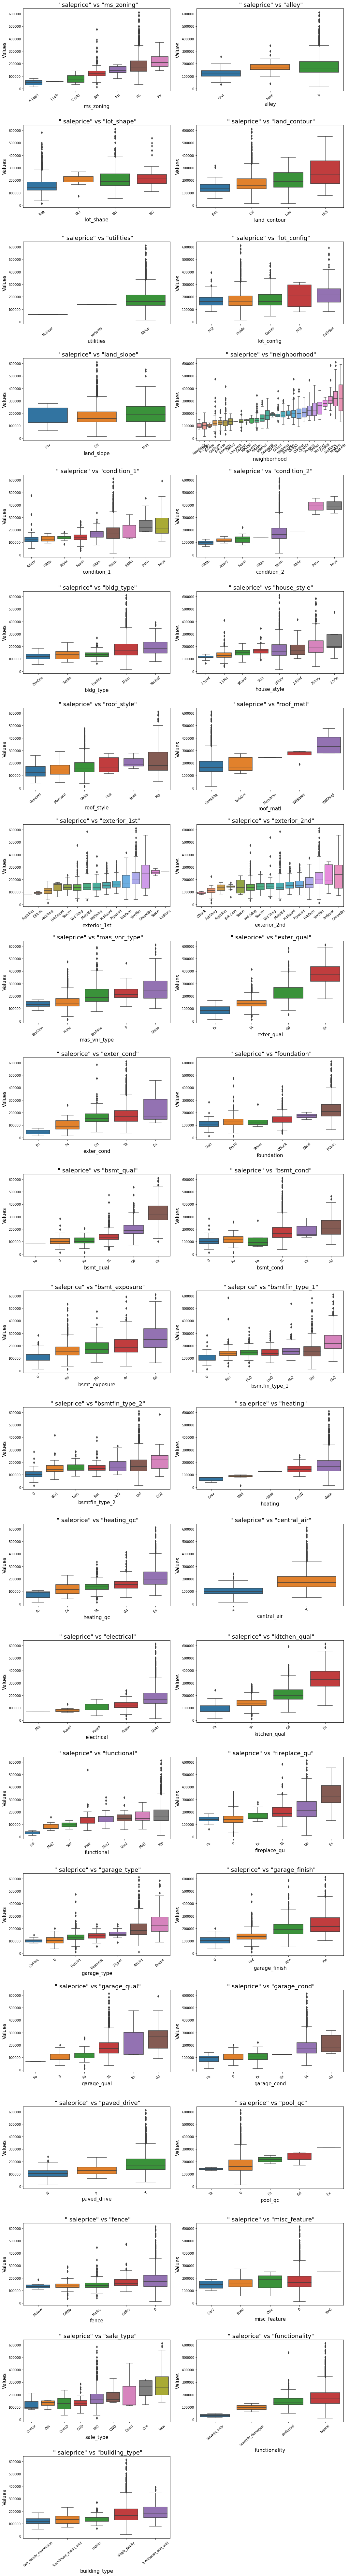

In [54]:
#applying the function on non-dummies DF
columns = train.select_dtypes(include = 'object').columns

boxplots(train, columns)

By and large, most of the categorial variables seem to have a linear relationship with saleprice. Therefore, I will keep them for further investigation.

In [55]:
#Land Slope and Lot config don't seem to affect sales price, so we can drop these 2 from the DFs
train.drop(['lot_config','land_slope'], axis =1, inplace=True)
test.drop(['lot_config','land_slope'], axis =1, inplace=True)

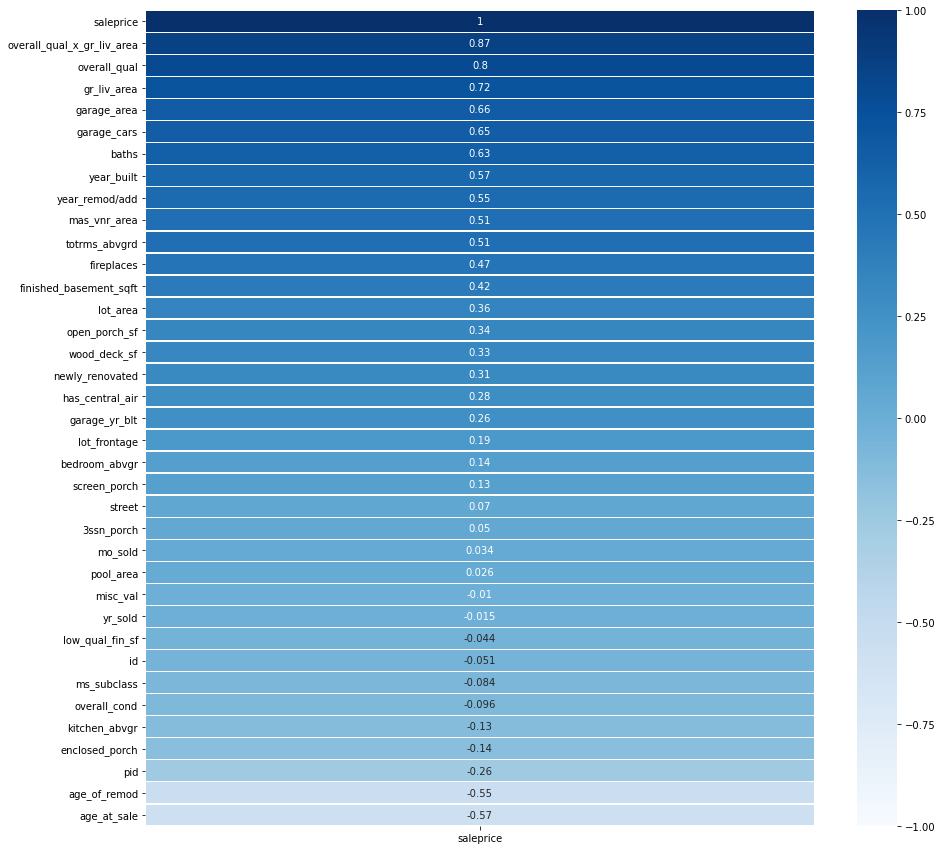

In [56]:
#correlation heatmap with just the saleprice column - within numerical DF
plt.figure(figsize = (15,15))
sns.heatmap(train.corr()[['saleprice']].sort_values(by=['saleprice'], ascending = False),
            annot=True, vmin=-1, vmax=1, linewidths=.5, cmap='Blues');

In [57]:
#masking all of the columns in the correlation matrix that are +- .1 of 0
mask =abs(train.corr()[['saleprice']].sort_values(by=['saleprice'], ascending= False))<.1

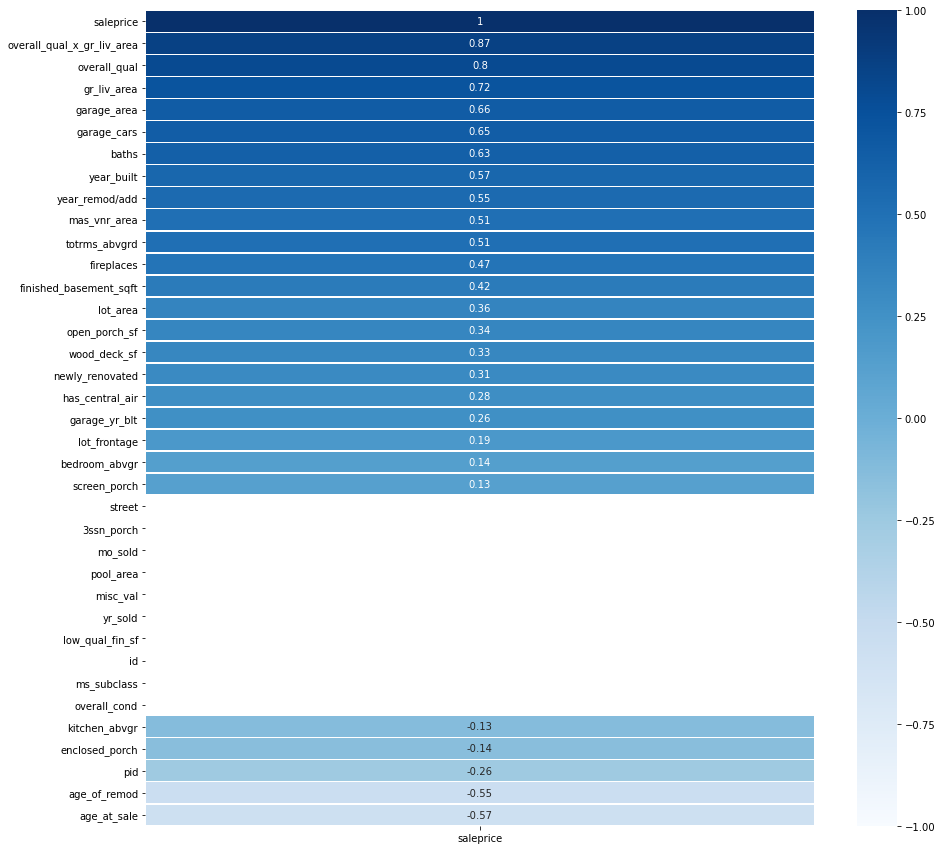

In [58]:
#masking values with low correlation
plt.figure(figsize=(15,15))
sns.heatmap(train.corr()[['saleprice']].sort_values(by=['saleprice'], ascending= False),mask=mask,annot=True, vmin=-1, vmax=1, linewidths=.5, cmap='Blues');

In [59]:
#selecting columns with positive correlation more than 0.15
numerical_correlated_features = (train.corr()[['saleprice']].sort_values('saleprice', ascending= False)[:25]).index.tolist()
numerical_correlated_features

['saleprice',
 'overall_qual_x_gr_liv_area',
 'overall_qual',
 'gr_liv_area',
 'garage_area',
 'garage_cars',
 'baths',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'totrms_abvgrd',
 'fireplaces',
 'finished_basement_sqft',
 'lot_area',
 'open_porch_sf',
 'wood_deck_sf',
 'newly_renovated',
 'has_central_air',
 'garage_yr_blt',
 'lot_frontage',
 'bedroom_abvgr',
 'screen_porch',
 'street',
 '3ssn_porch',
 'mo_sold']

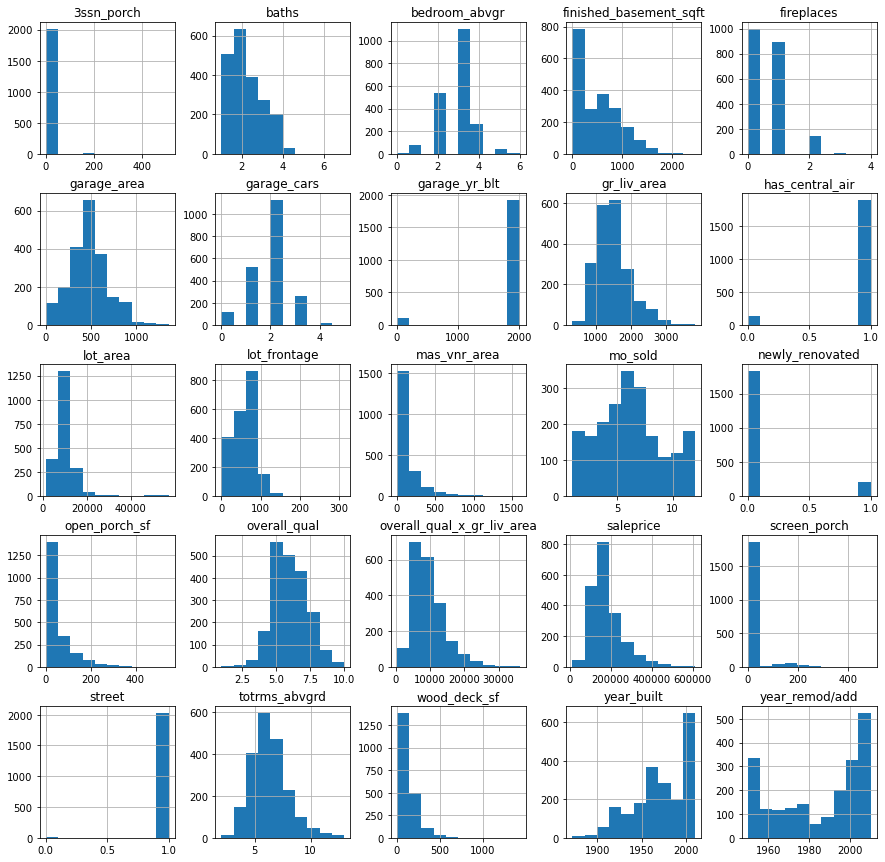

In [60]:
#plot histograms of the correlated features
train_dummies[numerical_correlated_features].hist(figsize=(15,15));

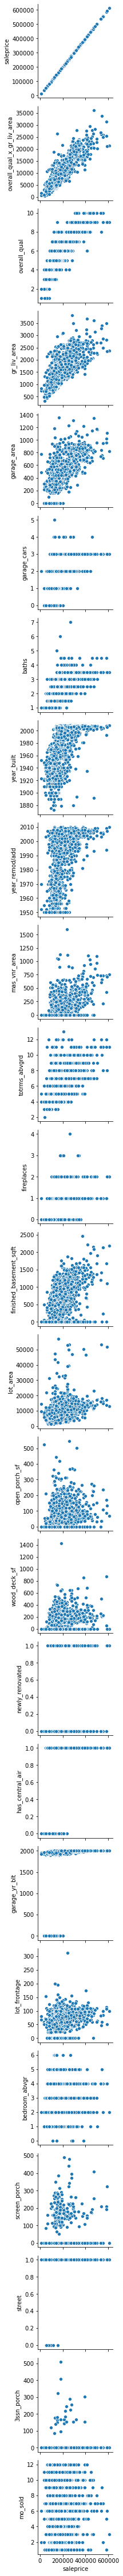

In [61]:
#plotting scatterplots of correlated features
sns.pairplot(train, y_vars=numerical_correlated_features, x_vars=['saleprice'])

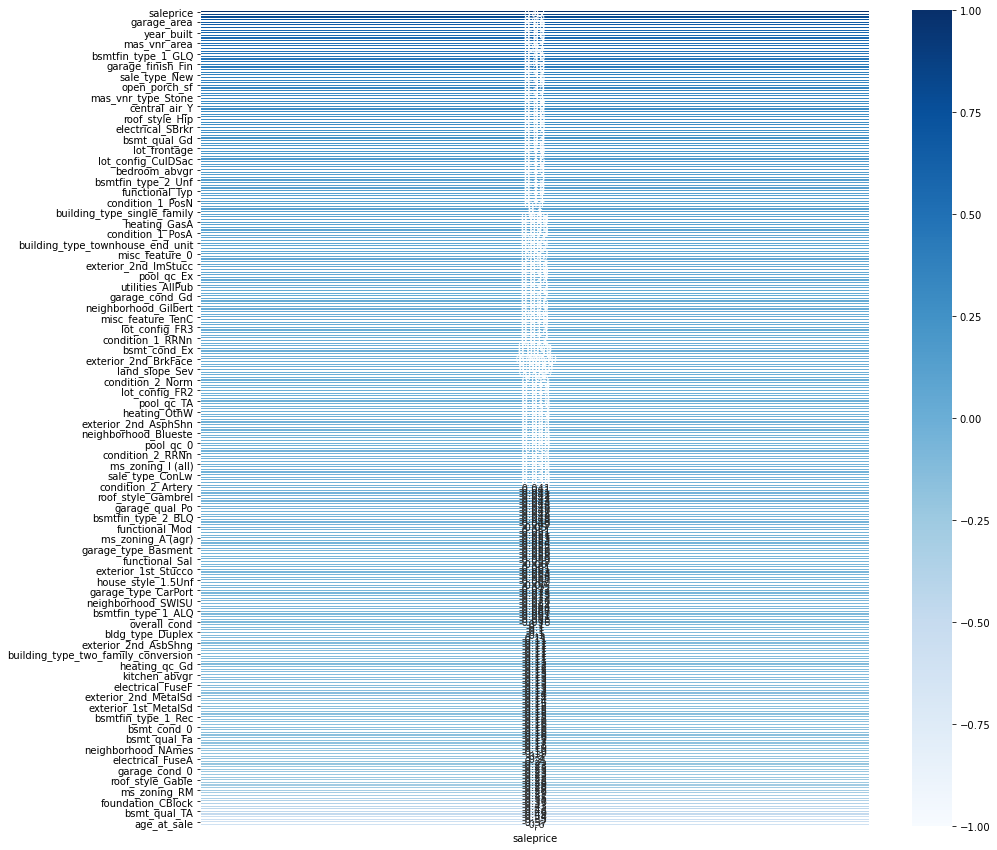

In [62]:
#correlation heatmap with just the saleprice column - within dummies DF
plt.figure(figsize = (15,15))
sns.heatmap(train_dummies.corr()[['saleprice']].sort_values(by=['saleprice'], ascending = False),
            annot=True, vmin=-1, vmax=1, linewidths=.5, cmap='Blues');

In [63]:
#masking all of the columns in the correlation matrix that are +- .1 of 0
mask =abs(train_dummies.corr()[['saleprice']].sort_values(by=['saleprice'], ascending= False))<.1

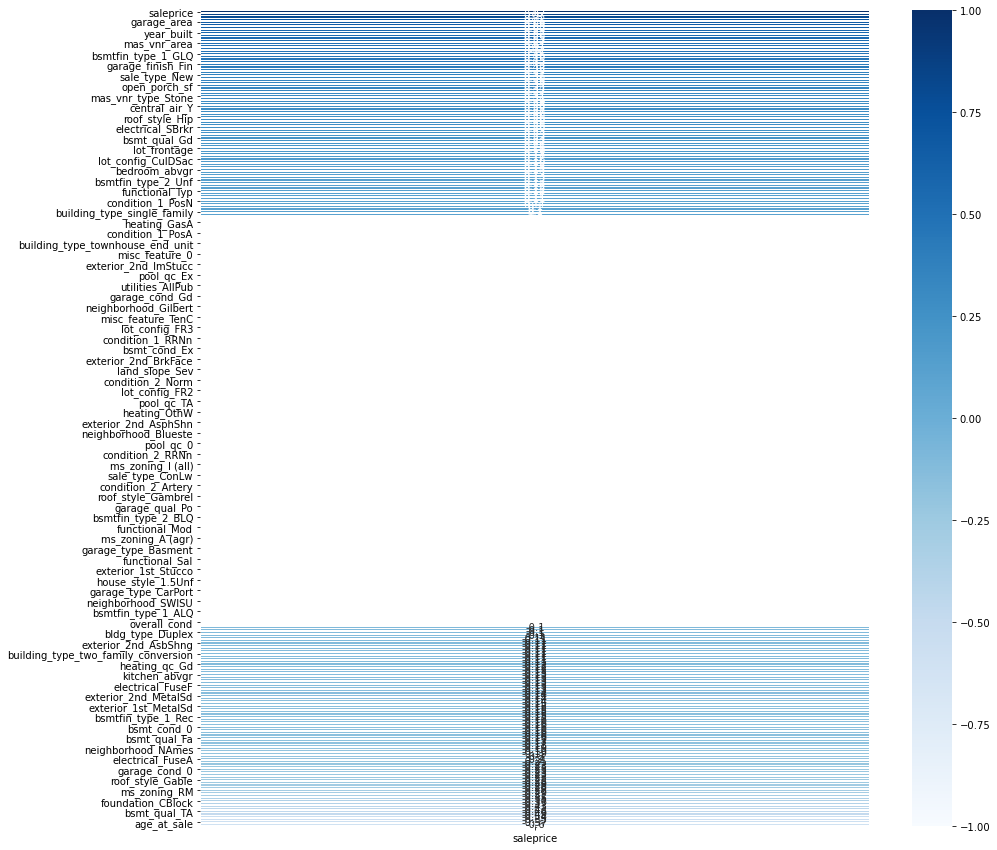

In [64]:
#masking values with low correlation
plt.figure(figsize=(15,15))
sns.heatmap(train_dummies.corr()[['saleprice']].sort_values(by=['saleprice'], ascending= False),mask=mask,annot=True, vmin=-1, vmax=1, linewidths=.5, cmap='Blues');

In [65]:
#selecting columns with positive correlation more than 0.15
correlated_features = (train_dummies.corr()[['saleprice']].sort_values('saleprice', ascending= False)[:55]).index.tolist()
correlated_features

['saleprice',
 'overall_qual_x_gr_liv_area',
 'overall_qual',
 'gr_liv_area',
 'garage_area',
 'garage_cars',
 'baths',
 'bsmt_qual_Ex',
 'year_built',
 'kitchen_qual_Ex',
 'year_remod/add',
 'foundation_PConc',
 'mas_vnr_area',
 'totrms_abvgrd',
 'exter_qual_Ex',
 'fireplaces',
 'bsmtfin_type_1_GLQ',
 'heating_qc_Ex',
 'exter_qual_Gd',
 'neighborhood_NridgHt',
 'garage_finish_Fin',
 'finished_basement_sqft',
 'fireplace_qu_Gd',
 'bsmt_exposure_Gd',
 'sale_type_New',
 'garage_type_Attchd',
 'lot_area',
 'exterior_1st_VinylSd',
 'open_porch_sf',
 'exterior_2nd_VinylSd',
 'wood_deck_sf',
 'newly_renovated',
 'mas_vnr_type_Stone',
 'kitchen_qual_Gd',
 'paved_drive_Y',
 'has_central_air',
 'central_air_Y',
 'lot_shape_IR1',
 'garage_cond_TA',
 'mas_vnr_type_BrkFace',
 'roof_style_Hip',
 'garage_yr_blt',
 'neighborhood_StoneBr',
 'neighborhood_NoRidge',
 'electrical_SBrkr',
 'garage_qual_TA',
 'fireplace_qu_Ex',
 'ms_zoning_RL',
 'bsmt_qual_Gd',
 'garage_type_BuiltIn',
 'land_contour_HLS',


In [66]:
#removing any duplicates and merging for first draft feature list
correlated_features = list(set(correlated_features + numerical_correlated_features))
correlated_features

['mas_vnr_type_BrkFace',
 'land_contour_HLS',
 'neighborhood_NridgHt',
 'sale_type_New',
 'fence_0',
 'fireplace_qu_Ex',
 'ms_zoning_RL',
 'lot_shape_IR1',
 'bsmt_qual_Gd',
 'bsmt_qual_Ex',
 'fireplaces',
 'electrical_SBrkr',
 'bsmt_exposure_Gd',
 'exter_qual_Gd',
 'lot_frontage',
 'garage_finish_RFn',
 'mas_vnr_area',
 'central_air_Y',
 'exterior_1st_VinylSd',
 'garage_cond_TA',
 'neighborhood_StoneBr',
 'has_central_air',
 'house_style_2Story',
 'fireplace_qu_Gd',
 'kitchen_qual_Ex',
 'mas_vnr_type_Stone',
 'garage_yr_blt',
 'screen_porch',
 '3ssn_porch',
 'exter_qual_Ex',
 'overall_qual',
 'bedroom_abvgr',
 'street',
 'neighborhood_NoRidge',
 'year_built',
 'year_remod/add',
 'gr_liv_area',
 'totrms_abvgrd',
 'baths',
 'garage_finish_Fin',
 'garage_cars',
 'roof_style_Hip',
 'mo_sold',
 'overall_qual_x_gr_liv_area',
 'exterior_2nd_VinylSd',
 'kitchen_qual_Gd',
 'open_porch_sf',
 'foundation_PConc',
 'paved_drive_Y',
 'saleprice',
 'heating_qc_Ex',
 'garage_area',
 'garage_type_Attch

In [67]:
len(correlated_features)

60

The scatterplots confirm the correlation heatmap findings, in that the features appear to show positive correlation.

## Looking at Categorical Features - Boxplots

### As there are quite a few categorical features, we need to plot boxplots to visualize better.

In [68]:
#finding categorical features from this list 

categorical_features = []
for x in correlated_features:
    if x.islower() == False:
        categorical_features.append(x)
        
categorical_features
        


['mas_vnr_type_BrkFace',
 'land_contour_HLS',
 'neighborhood_NridgHt',
 'sale_type_New',
 'fireplace_qu_Ex',
 'ms_zoning_RL',
 'lot_shape_IR1',
 'bsmt_qual_Gd',
 'bsmt_qual_Ex',
 'electrical_SBrkr',
 'bsmt_exposure_Gd',
 'exter_qual_Gd',
 'garage_finish_RFn',
 'central_air_Y',
 'exterior_1st_VinylSd',
 'garage_cond_TA',
 'neighborhood_StoneBr',
 'house_style_2Story',
 'fireplace_qu_Gd',
 'kitchen_qual_Ex',
 'mas_vnr_type_Stone',
 'exter_qual_Ex',
 'neighborhood_NoRidge',
 'garage_finish_Fin',
 'roof_style_Hip',
 'exterior_2nd_VinylSd',
 'kitchen_qual_Gd',
 'foundation_PConc',
 'paved_drive_Y',
 'heating_qc_Ex',
 'garage_type_Attchd',
 'garage_qual_TA',
 'bsmtfin_type_1_GLQ',
 'garage_type_BuiltIn']

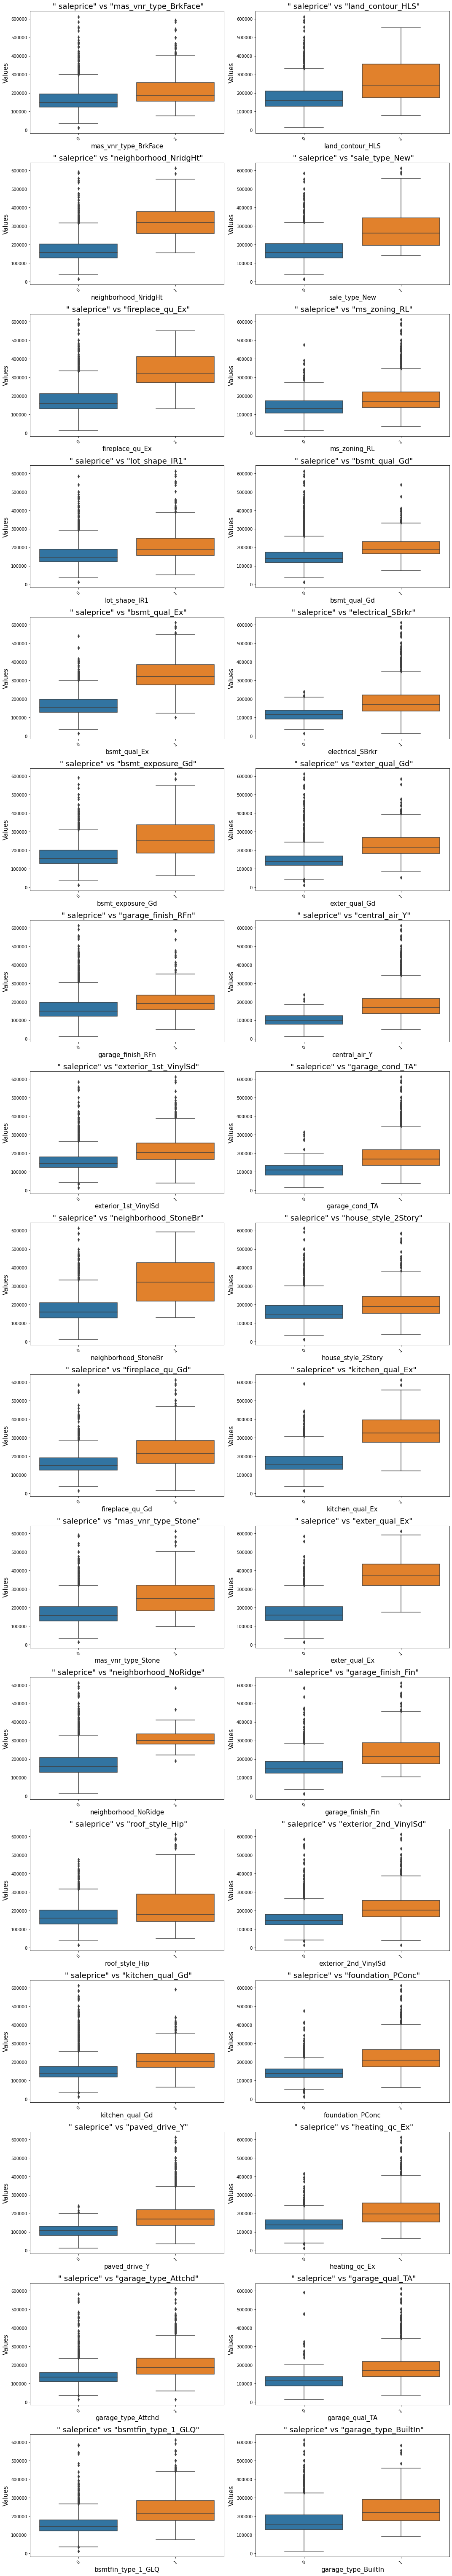

In [69]:
#plotting via previously used function
boxplots(train_dummies, categorical_features)

Through these boxplots, we can confirm the linear relationship of saleprice and these categorical features (using get dummies function). There are no features to be dropped at this stage.

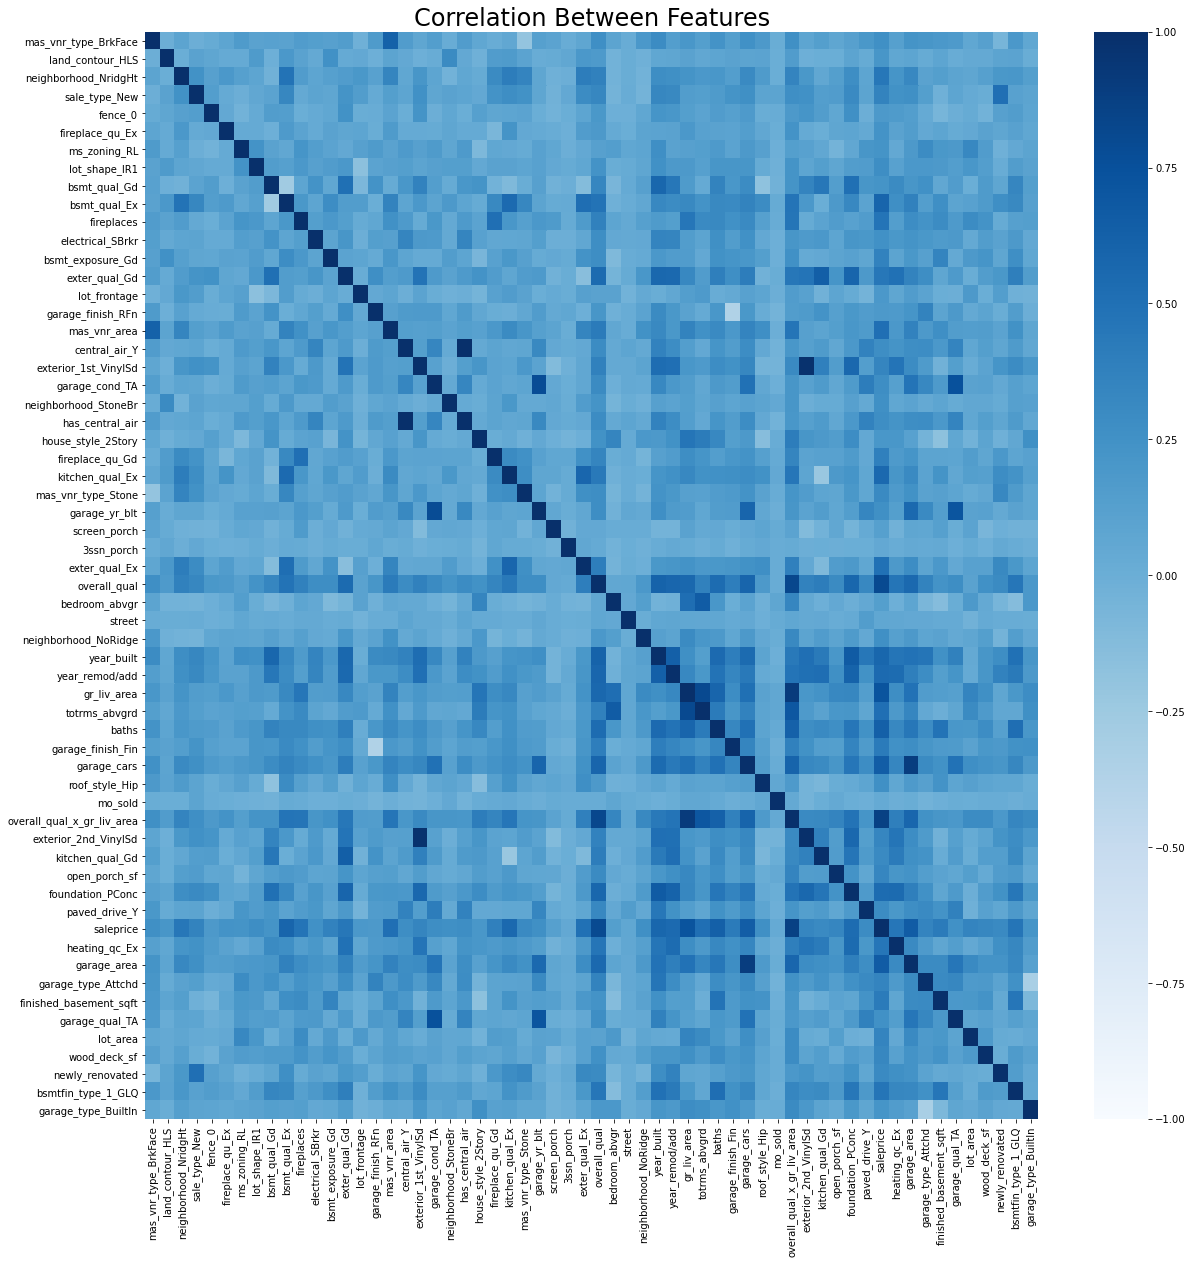

In [70]:
#plotting correlation b/w features 

plt.figure(figsize=(20, 20))
sns.heatmap(train_dummies[correlated_features].corr(),
           cmap='Blues',
           vmin=-1)
plt.title("Correlation Between Features", fontsize=24);

### As there is some collinearity observed in features, notably between - 
1) Garage cars and Garage area  
2) Total rooms above grade and above grade living area  
### We will use Ridge/Lasso regression to apply a penalty to the coefficients

### I decided to create an interaction feature - which amplifies signal for selected categorial variables (above 0.5 correlation) with sale price to reflect better in linear regression

In [71]:
def amplify_feature(feature_list):
    list_feat = []
    for x in feature_list:
        train_dummies[x +"3"] = train_dummies[x] * train_dummies[x]
        test_dummies[x + "3"] = test_dummies[x] * test_dummies[x]
        list_feat.append( x + "3")
        list_features= [x + "3" if i== x else i for i in correlated_features]
    return list_feat

In [72]:
#calling the function to confirm amplification
amplified = amplify_feature(categorical_features)
amplified

['mas_vnr_type_BrkFace3',
 'land_contour_HLS3',
 'neighborhood_NridgHt3',
 'sale_type_New3',
 'fireplace_qu_Ex3',
 'ms_zoning_RL3',
 'lot_shape_IR13',
 'bsmt_qual_Gd3',
 'bsmt_qual_Ex3',
 'electrical_SBrkr3',
 'bsmt_exposure_Gd3',
 'exter_qual_Gd3',
 'garage_finish_RFn3',
 'central_air_Y3',
 'exterior_1st_VinylSd3',
 'garage_cond_TA3',
 'neighborhood_StoneBr3',
 'house_style_2Story3',
 'fireplace_qu_Gd3',
 'kitchen_qual_Ex3',
 'mas_vnr_type_Stone3',
 'exter_qual_Ex3',
 'neighborhood_NoRidge3',
 'garage_finish_Fin3',
 'roof_style_Hip3',
 'exterior_2nd_VinylSd3',
 'kitchen_qual_Gd3',
 'foundation_PConc3',
 'paved_drive_Y3',
 'heating_qc_Ex3',
 'garage_type_Attchd3',
 'garage_qual_TA3',
 'bsmtfin_type_1_GLQ3',
 'garage_type_BuiltIn3']

In [73]:
#remove un-amplified categorical features and add in new ones to feature list

new_list = []

for i in correlated_features:
    if i in categorical_features:
        correlated_features.remove(i)

         


In [74]:
correlated_features_without_amplify = [item for item in correlated_features if item not in categorical_features]

In [75]:
new_correlated_features = correlated_features_without_amplify + amplified 

In [76]:
new_correlated_features 

['fence_0',
 'fireplaces',
 'lot_frontage',
 'mas_vnr_area',
 'has_central_air',
 'garage_yr_blt',
 'screen_porch',
 '3ssn_porch',
 'overall_qual',
 'bedroom_abvgr',
 'street',
 'year_built',
 'year_remod/add',
 'gr_liv_area',
 'totrms_abvgrd',
 'baths',
 'garage_cars',
 'mo_sold',
 'overall_qual_x_gr_liv_area',
 'open_porch_sf',
 'saleprice',
 'garage_area',
 'finished_basement_sqft',
 'lot_area',
 'wood_deck_sf',
 'newly_renovated',
 'mas_vnr_type_BrkFace3',
 'land_contour_HLS3',
 'neighborhood_NridgHt3',
 'sale_type_New3',
 'fireplace_qu_Ex3',
 'ms_zoning_RL3',
 'lot_shape_IR13',
 'bsmt_qual_Gd3',
 'bsmt_qual_Ex3',
 'electrical_SBrkr3',
 'bsmt_exposure_Gd3',
 'exter_qual_Gd3',
 'garage_finish_RFn3',
 'central_air_Y3',
 'exterior_1st_VinylSd3',
 'garage_cond_TA3',
 'neighborhood_StoneBr3',
 'house_style_2Story3',
 'fireplace_qu_Gd3',
 'kitchen_qual_Ex3',
 'mas_vnr_type_Stone3',
 'exter_qual_Ex3',
 'neighborhood_NoRidge3',
 'garage_finish_Fin3',
 'roof_style_Hip3',
 'exterior_2nd_Viny

In [77]:
len(new_correlated_features)

60

In [78]:
#preliminary feature set
features = [col for col in new_correlated_features if col != 'saleprice']
len(features)

59

In [79]:
X = train_dummies[features]
y = train_dummies['saleprice']

In [80]:
y.mean()

180961.07149853086

# Data Modelling

## Train, Test Split Validation

In [81]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state=42)

In [82]:
#initialize scaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_validate_scaled = ss.transform(X_validate)


## Instantiate Models

In [83]:
lr = LinearRegression()

In [84]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [85]:
lasso = LassoCV(n_alphas=200)

In [86]:
enet = ElasticNetCV(alphas=np.arange(0.5, 1.0, 0.005))

## Getting Cross Validation Estimates

In [87]:
#LR estimate test r2 using cross val
lr_cv_score = cross_val_score(lr, X_train_scaled, y_train, cv = 5).mean()
lr_cv_score

0.9106853766970812

In [88]:
#LR estimate test RMSE using cross val
lr_cv_score_RMSE = -cross_val_score(lr, X_train_scaled, y_train, cv = 5, scoring= 'neg_root_mean_squared_error').mean()
lr_cv_score_RMSE

23469.95220012401

In [89]:
#Ridge estimate r2
ridge_cv_score = cross_val_score(ridge, X_train_scaled, y_train, cv=5).mean()
ridge_cv_score

0.9106463964773728

In [90]:
#ridge estimate adjusted R2
ridge_cv_score_adj_r_squared = 1 - (1 - ridge_cv_score)*(len(y)-1)/(len(y)-X_train_scaled.shape[1]-1)
ridge_cv_score_adj_r_squared

0.9079865263422391

In [91]:
#Ridge estimate RMSE
ridge_RMSE_score = -cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
ridge_RMSE_score

23479.641969310625

In [92]:
#Lasso estimate r2
lasso_cv_score = cross_val_score(lasso, X_train_scaled, y_train, cv=5).mean()
lasso_cv_score

0.911861350283026

In [93]:
#lasso estimate adjusted R2
lasso_cv_score_adj_r_squared = 1 - (1 - lasso_cv_score)*(len(y)-1)/(len(y)-X_train_scaled.shape[1]-1)
lasso_cv_score_adj_r_squared

0.909237646784892

In [94]:
#lasso estimate RMSE
lasso_RMSE_score = -cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
lasso_RMSE_score

23346.446720378888

In [95]:
#ElasticNet estimate r2
enet_cv_score = cross_val_score(enet, X_train_scaled, y_train, cv=5).mean()
enet_cv_score

0.9049279490205832

In [96]:
#lasso estimate adjusted R2
enet_cv_score_adj_r_squared = 1 - (1 - enet_cv_score)*(len(y)-1)/(len(y)-X_train_scaled.shape[1]-1)
enet_cv_score_adj_r_squared

0.9020978526493493

In [97]:
#Elasticnet estimate RMSE
enet_RMSE_score = -cross_val_score(enet, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
enet_RMSE_score

24335.28813561434

# Model Fitting and Evaluation 
## Linear Regression

In [98]:
lr.fit(X_train_scaled,y_train)

print("Training RMSE(LR) " + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_scaled)))))
print("Testing RMSE(LR) " + str(np.sqrt(mean_squared_error(y_validate,lr.predict(X_validate_scaled)))))

print("Estimate of Testing RMSE (LR)" + str((lr_cv_score_RMSE)))

Training RMSE(LR) 22090.13599538028
Testing RMSE(LR) 21850.646589171705
Estimate of Testing RMSE (LR)23469.95220012401


## Ridge

In [99]:
ridge.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [100]:
ridge.alpha_

1.6

In [101]:
print("Training RMSE(Ridge) " + str(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_scaled)))))
print("Testing RMSE(Ridge) " + str(np.sqrt(mean_squared_error(y_validate,ridge.predict(X_validate_scaled)))))

print("Estimate of Testing RMSE (Ridge) " + str((ridge_RMSE_score)))

Training RMSE(Ridge) 22094.877072416413
Testing RMSE(Ridge) 21910.95483901271
Estimate of Testing RMSE (Ridge) 23479.641969310625


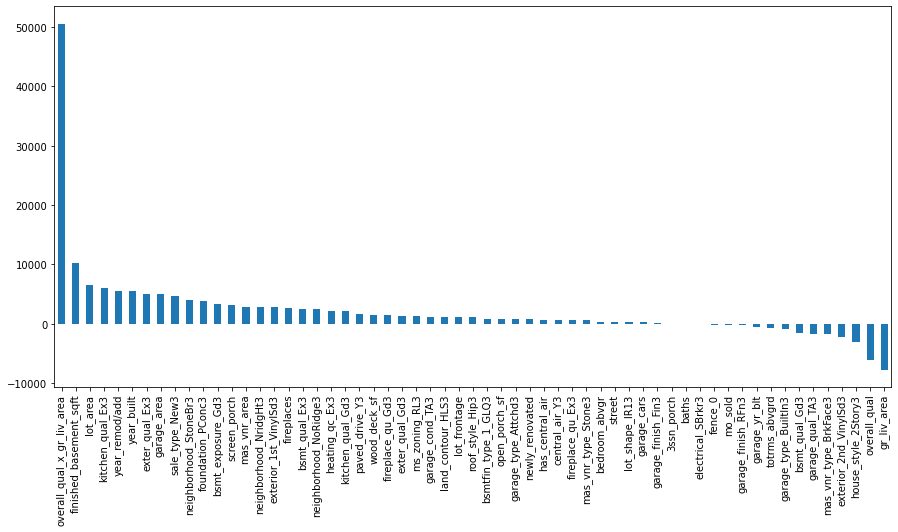

In [102]:
#to see how the coefficients have been regularized in ridge
pd.Series(ridge.coef_, index=features).sort_values(ascending = False).plot.bar(figsize=(15, 7));

## Lasso

In [103]:
lasso.fit(X_train_scaled,y_train)

LassoCV(n_alphas=200)

In [104]:
print("Training RMSE(Lasso) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_scaled)))))
print("Testing RMSE(Lasso) " + str(np.sqrt(mean_squared_error(y_validate,lasso.predict(X_validate_scaled)))))

print("Estimate of Testing RMSE (Lasso)" + str((lasso_RMSE_score)))

Training RMSE(Lasso) 22261.45424676417
Testing RMSE(Lasso) 22154.76835286791
Estimate of Testing RMSE (Lasso)23346.446720378888


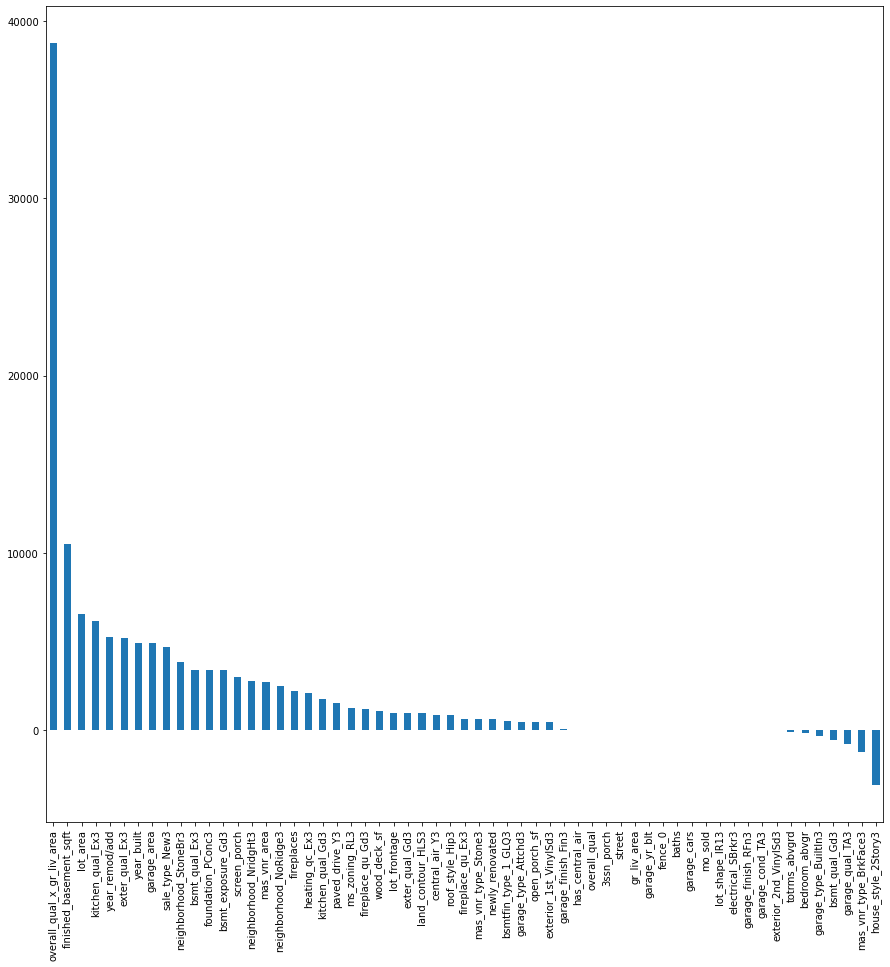

In [105]:
#to see how the coefficients have been regularized in lasso
pd.Series(lasso.coef_, index=features).sort_values(ascending = False).plot.bar(figsize=(15, 15));

## Using Lasso coefficient penalties (visualized as above) to enable further feature selection, I have decided to remove some features which have been negated- 


In [106]:

lasso_feat_drop = pd.Series(lasso.coef_, index=features).sort_values(ascending = True)
lasso_feat_drop

house_style_2Story3           -3061.293537
mas_vnr_type_BrkFace3         -1236.684338
garage_qual_TA3                -767.186434
bsmt_qual_Gd3                  -524.360676
garage_type_BuiltIn3           -308.638961
bedroom_abvgr                  -162.151445
totrms_abvgrd                   -93.506105
exterior_2nd_VinylSd3             0.000000
garage_cond_TA3                   0.000000
garage_finish_RFn3               -0.000000
electrical_SBrkr3                 0.000000
lot_shape_IR13                    0.000000
mo_sold                          -0.000000
garage_cars                       0.000000
baths                            -0.000000
fence_0                          -0.000000
garage_yr_blt                    -0.000000
gr_liv_area                      -0.000000
street                            0.000000
3ssn_porch                       -0.000000
overall_qual                      0.000000
has_central_air                  16.558659
garage_finish_Fin3              100.206023
exterior_1s

In [107]:
#removing all features that have are below 750 coefficient in lasso
features = pd.Series(lasso.coef_, index=features).sort_values(ascending = True).where(lambda x : x>750).dropna().index.tolist()


In [108]:
features

['roof_style_Hip3',
 'central_air_Y3',
 'land_contour_HLS3',
 'exter_qual_Gd3',
 'lot_frontage',
 'wood_deck_sf',
 'fireplace_qu_Gd3',
 'ms_zoning_RL3',
 'paved_drive_Y3',
 'kitchen_qual_Gd3',
 'heating_qc_Ex3',
 'fireplaces',
 'neighborhood_NoRidge3',
 'mas_vnr_area',
 'neighborhood_NridgHt3',
 'screen_porch',
 'bsmt_exposure_Gd3',
 'foundation_PConc3',
 'bsmt_qual_Ex3',
 'neighborhood_StoneBr3',
 'sale_type_New3',
 'garage_area',
 'year_built',
 'exter_qual_Ex3',
 'year_remod/add',
 'kitchen_qual_Ex3',
 'lot_area',
 'finished_basement_sqft',
 'overall_qual_x_gr_liv_area']

In [109]:
#confirming length of revised feature list
len(features)

29

In order to balance bias and variance, I manually set the penalty at 750. This reduced the number of features in the model to just 28. The train and test scores show that this model is currently slightly overfit. With this feature regularization, it should be more balanced.

# Final Model Selection - after dropping some features

In [110]:
X = train_dummies[features]
y = train_dummies['saleprice']

In [111]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, random_state=42)

In [112]:
#initialize scaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_validate_scaled = ss.transform(X_validate)


In [113]:
lr = LinearRegression()

In [114]:
lasso = LassoCV(n_alphas=200)

In [115]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [116]:
enet = ElasticNetCV(alphas=np.arange(0.5, 1.0, 0.005))

In [117]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [118]:
ridge.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [119]:
lasso.fit(X_train_scaled,y_train)

LassoCV(n_alphas=200)

In [120]:
enet.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
       0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
       0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
       0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
       0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
       0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
       0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 ,
       0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 , 0.855,
       0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895, 0.9  ,
       0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 , 0.945,
       0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985, 0.99 ,
       0.995]))

In [121]:
ridge.alpha_

10.0

In [122]:
lasso.alpha_

71.76384276975018

In [123]:
enet.alpha_

0.5

In [124]:
#ridge estimate RMSE
ridge_RMSE_score = -cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
ridge_RMSE_score

23343.00948312032

In [125]:
#LR estimate RMSE
lr_RMSE_score = -cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
lr_RMSE_score

23347.06758584492

In [126]:
#lasso estimate RMSE
lasso_RMSE_score = -cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
lasso_RMSE_score

23337.641231483496

In [127]:
#Elasticnet estimate RMSE
enet_RMSE_score = -cross_val_score(enet, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
enet_RMSE_score

24456.4711151192

In [128]:
print("Training RMSE(Ridge) " + str(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_scaled)))))
print("Testing RMSE(Ridge) " + str(np.sqrt(mean_squared_error(y_validate,ridge.predict(X_validate_scaled)))))

print("Estimate of Testing RMSE (Ridge) " + str((ridge_RMSE_score)))

Training RMSE(Ridge) 22591.5302505205
Testing RMSE(Ridge) 22582.58377837424
Estimate of Testing RMSE (Ridge) 23343.00948312032


In [129]:
print("Training RMSE(LR) " + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_scaled)))))
print("Testing RMSE(LR) " + str(np.sqrt(mean_squared_error(y_validate,lr.predict(X_validate_scaled)))))

print("Estimate of Testing RMSE (LR) " + str((lr_RMSE_score)))

Training RMSE(LR) 22588.602551436383
Testing RMSE(LR) 22565.468519461458
Estimate of Testing RMSE (LR) 23347.06758584492


In [130]:
print("Training RMSE(Lasso) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_scaled)))))
print("Testing RMSE(Lasso) " + str(np.sqrt(mean_squared_error(y_validate,lasso.predict(X_validate_scaled)))))

print("Estimate of Testing RMSE (Lasso)" + str((lasso_RMSE_score)))

Training RMSE(Lasso) 22589.656679226286
Testing RMSE(Lasso) 22564.088950861067
Estimate of Testing RMSE (Lasso)23337.641231483496


In [131]:
print("Training RMSE(Enet) " + str(np.sqrt(mean_squared_error(y_train, enet.predict(X_train_scaled)))))
print("Testing RMSE(Enet) " + str(np.sqrt(mean_squared_error(y_validate,enet.predict(X_validate_scaled)))))

print("Estimate of Testing RMSE (Enet)" + str((enet_RMSE_score)))

Training RMSE(Enet) 23888.08924456835
Testing RMSE(Enet) 24056.050725941976
Estimate of Testing RMSE (Enet)24456.4711151192


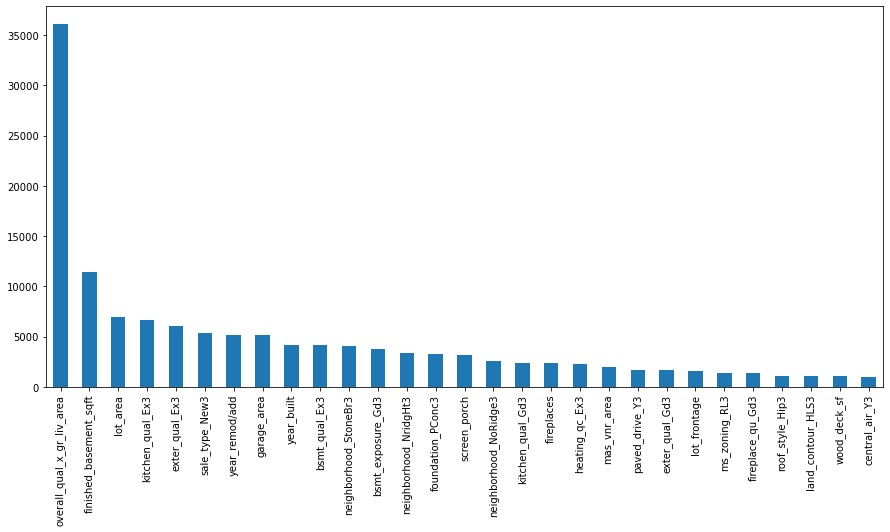

In [132]:
#to see how the final model coefficients have been regularized in lasso
pd.Series(lasso.coef_, index=features).sort_values(ascending = False).plot.bar(figsize=(15, 7));

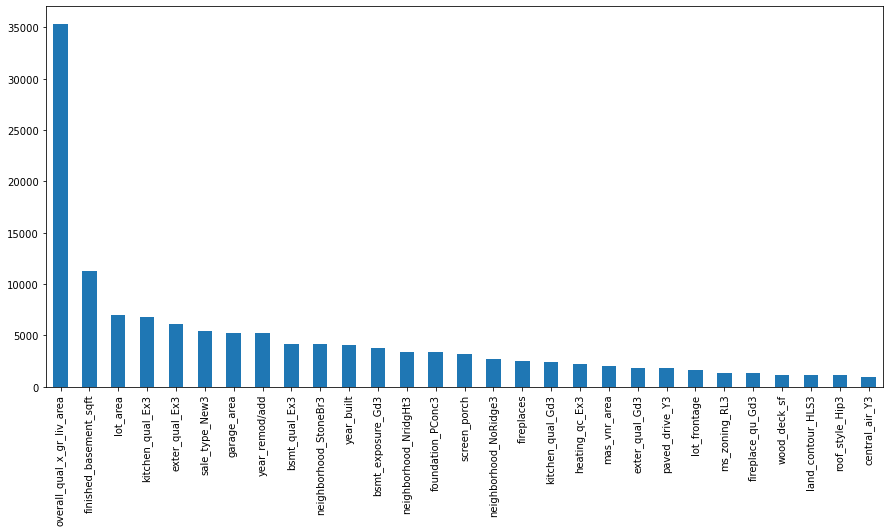

In [133]:
#to see how the final model coefficients have been regularized in ridge
pd.Series(ridge.coef_, index=features).sort_values(ascending = False).plot.bar(figsize=(15, 7));

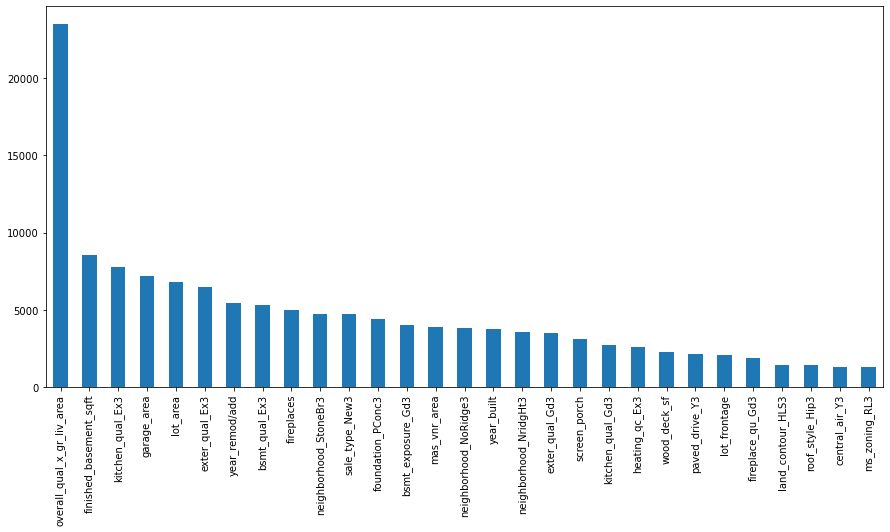

In [134]:
#to see how the final model coefficients have been regularized in elasticnet
pd.Series(enet.coef_, index=features).sort_values(ascending = False).plot.bar(figsize=(15, 7));

## With an estimated mean squared error on sale price of under $24,000, I am confident to proceed with Ridge as the final model and feel it has reasonably low bias and variance after several iterations. Additionally, it does not seem to be over/underfit.  

If I could improve this model, I would use more features. Given that we were limited to 25-30 features, I believe acheiving a higher score would be difficult.

## Visualization on final model selected 

## Generating and using Optimal Alpha

In [135]:
r_alphas = np.logspace(0, 50, 100)
# Generates 100 values equally between 0 and 50,


# Cross-validate over our list of ridge alphas.
ridge_model = RidgeCV(alphas=r_alphas, scoring='neg_root_mean_squared_error', cv=5)

# Fit model using best ridge alpha!
ridge_model = ridge_model.fit(X_train_scaled, y_train)

In [136]:
#ridge estimate RMSE
ridge_RMSE_score = -cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring= 'neg_root_mean_squared_error').mean()
ridge_RMSE_score

23339.34802776633

In [137]:
#ridge estimate R2
ridge_r2_score = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5).mean()
ridge_r2_score

0.9120050247186302

In [138]:
#ridge estimate adjusted R2
adj_r_squared = 1 - (1 - ridge_r2_score)*(len(y)-1)/(len(y)-X_train_scaled.shape[1]-1)
adj_r_squared

0.9107367074804793

In [139]:
print("Training RMSE(Ridge w/optimal alpha) " + str(np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train_scaled)))))
print("Testing RMSE(Ridge w/optimal alpha) " + str(np.sqrt(mean_squared_error(y_validate,ridge_model.predict(X_validate_scaled)))))

print("Estimate of Testing RMSE (Ridgew/optimal alpha) " + str((ridge_RMSE_score)))

Training RMSE(Ridge w/optimal alpha) 22591.666089995782
Testing RMSE(Ridge w/optimal alpha) 22583.041416820004
Estimate of Testing RMSE (Ridgew/optimal alpha) 23339.34802776633


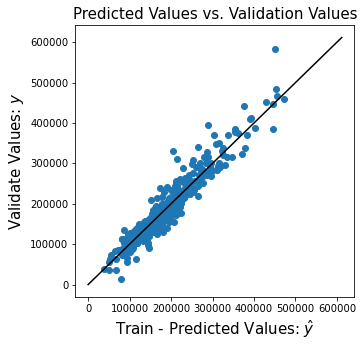

In [140]:
#Testing how this model might look like on validation set

y_pred_ridge = ridge_model.predict(X_validate_scaled)

# Plot the model
plt.figure(figsize=(5,5))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_pred_ridge, y_validate)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Train - Predicted Values: $\hat{y}$", fontsize = 15)
plt.ylabel("Validate Values: $y$", fontsize = 15)
plt.title('Predicted Values vs. Validation Values', fontsize = 15);

It seems that the model is good at predicting mid-range values for houses, but falters slightly at higher values.

In [141]:
residuals_ridge = y_validate - y_pred_ridge

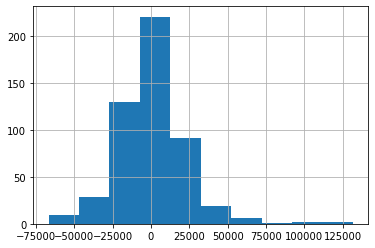

In [142]:
residuals_ridge.hist();

From the above histogram, it is evident that the residuals are not normally distributed. On both tails of the distribution, there are some residuals that indicate that the model's prediction was incorrect by quite a bit.

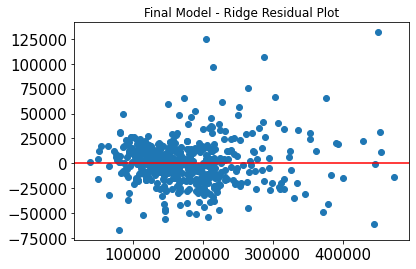

In [143]:
plt.scatter(y_pred_ridge, residuals_ridge);
plt.axhline(0, color='r');
plt.title("Final Model - Ridge Residual Plot");
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

The disparity at higher end of prices is further amplified by this plot. The residuals increase at the more extreme predicted values.

This model is able to account for approximately 91% of the variation in Sale Price of a property (adjusted R2 score) and is able to predict the Sales Price within $24,000. 

Further exploration of the residuals of this model revealed that it is not as accurate at predicting higher values. Perhaps a non-linear model will be a better fit to lower the bias at the higher end of price.

An interesting duality in this the model is the interaction feature of quality and living area. While it makes the model more accurate, it may not be as useful to answer the problem statement. From the perspective of users of this data (sellers) - it is easier to increase the overall quality of the house (with better materials etc), rather than increase the living area.

# Predictions on Kaggle DF and Export

In [144]:
X_kaggle = test_dummies[features]

In [145]:
X_train = train_dummies[features]

In [146]:
#initialize scaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_kaggle_scaled = ss.transform(X_kaggle)

In [147]:
test_predictions = ridge_model.predict(X_kaggle_scaled)
submit_df = pd.DataFrame(test['id'])
submit_df['saleprice'] = test_predictions

In [148]:
submit_df.rename(columns={"id": "Id", "saleprice": "SalePrice"})

,Id,SalePrice
0,2658,137152.593883
1,2718,149188.839012
2,2414,234910.555822
3,1989,103830.330810
4,625,168875.385630
...,...,...
874,1662,187444.873508
875,1234,215897.586179
876,1373,140227.752193
877,1672,120631.180840


In [149]:
submit_df.to_csv('../datasets/final_predictions_20_nov.csv', index=False)

## This model has an RMSE score of $24980 on Kaggle, thus I am happy to proceed as the final output.

# Conclusions and Recommendations

In [150]:
#top coefficients as per this model
pd.Series(ridge.coef_, index=features).sort_values(ascending = False)

overall_qual_x_gr_liv_area    35292.462291
finished_basement_sqft        11308.618639
lot_area                       6964.636429
kitchen_qual_Ex3               6808.022352
exter_qual_Ex3                 6104.373549
sale_type_New3                 5385.419446
garage_area                    5225.568410
year_remod/add                 5203.524185
bsmt_qual_Ex3                  4211.705075
neighborhood_StoneBr3          4208.267459
year_built                     4043.423839
bsmt_exposure_Gd3              3746.145623
neighborhood_NridgHt3          3409.039331
foundation_PConc3              3360.449824
screen_porch                   3191.665864
neighborhood_NoRidge3          2748.362612
fireplaces                     2540.974487
kitchen_qual_Gd3               2461.401288
heating_qc_Ex3                 2250.289739
mas_vnr_area                   2045.219786
exter_qual_Gd3                 1829.767230
paved_drive_Y3                 1784.546687
lot_frontage                   1681.283121
ms_zoning_R

### Circling back to the key question - how can home sellers in Ames derive value from this data?

Based on the current model, insights about the contribution of specific features to Sale Price can be derived from the analysis. 

Given that it will be unlikely or extremely difficult to increase any continuous variables (such as lot frontage or square footage), I have decided to base recommendations only on categorial variables as these can be changed by sellers.

### Assuming all other factors remain constant, we can expect that:

Having excellent kitchen quality will result in \$6773 increase in sale price 

Having excellent exterior quality will result in \$6055 increase in sale price

A newly contructed and sold home will result in \$5362 increase in sale price

Homes in StoneBrook neighbourhood will result in \$4201 increase in sale price

Excellent Basement Quality will result in \$4165 increase in sale price

Good Basement Exposure will result in \$3726 increase in sale price

Homes in Northridge Heights neighbourhood will result in \$3376 increase in sale price

Homes with poured concrete foundation will result in \$3272 increase in sale price

Homes in Northridge neighbourhood will result in \$2724 increase in sale price

Having good kitchen quality will result in \$2444 increase in sale price

Having excellent heating quality will result in \$2354 increase in sale price

Having a paved drive will result in \$1964 increase in sale price

Having good exterior quality will result in \$1747 increase in sale price

Home in Low Density Residential zones will result in \$1426 increase in sale price

Having good fireplace quality will result in \$1377 increase in sale price

Having a hillside slope contour will result in \$1142 increase in sale price

Having a hip style roof will result in \$1107 increase in sale price

## I trust that these recommendations are useful to prospective home sellers, and can help them identify variables that they can change in order to get the most selling price.